In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація зображень до діапазону [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Додавання одного виміру для згорткових шарів
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Перетворення міток у категоріальний формат
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()

# Перший згортковий шар
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Другий згортковий шар
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Третій згортковий шар
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Вирівнювання даних для повнозв'язних шарів
model.add(layers.Flatten())

# Повнозв'язний шар
model.add(layers.Dense(64, activation='relu'))

# Вихідний шар
model.add(layers.Dense(10, activation='softmax'))

# Виведення архітектури моделі
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних: {test_acc:.4f}')

# Створення багатошарової мережі
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(28, 28, 1)))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(64, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

# Компіляція та навчання
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінка на тестових даних
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_images, test_labels)
print(f'Точність багатошарової мережі на тестових даних: {mlp_test_acc:.4f}')

d:\IT\Тимчасові\Homework_Data_Science\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 171s 205ms/step - accuracy: 0.6878 - loss: 0.8347 - val_accuracy: 0.8514 - val_loss: 0.4047
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 191s 189ms/step - accuracy: 0.8617 - loss: 0.3831 - val_accuracy: 0.8772 - val_loss: 0.3445
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 138s 183ms/step - accuracy: 0.8837 - loss: 0.3206 - val_accuracy: 0.8828 - val_loss: 0.3204
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.8963 - loss: 0.2835 - val_accuracy: 0.8917 - val_loss: 0.3019
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 176s 227ms/step - accuracy: 0.9057 - loss: 0.2602 - val_accuracy: 0.8948 - val_loss: 0.2862
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 178s 236ms/step - accuracy: 0.9085 - loss: 0.2436 - val_accuracy: 0.8982 - val_loss: 0.2761
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 228s 269ms/step - accuracy: 0.9183 - loss: 0.2236 - val_accuracy: 0.8944 - val_loss: 0.2960
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 209s 277ms/step - accuracy: 0.9245 -

d:\IT\Тимчасові\Homework_Data_Science\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.7563 - loss: 0.7025 - val_accuracy: 0.8362 - val_loss: 0.4732
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8589 - loss: 0.3936 - val_accuracy: 0.8556 - val_loss: 0.3999
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8726 - loss: 0.3521 - val_accuracy: 0.8705 - val_loss: 0.3706
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8790 - loss: 0.3300 - val_accuracy: 0.8790 - val_loss: 0.3403
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8878 - loss: 0.3030 - val_accuracy: 0.8827 - val_loss: 0.3337
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8927 - loss: 0.2890 - val_accuracy: 0.8703 - val_loss: 0.3557
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9014 - loss: 0.2662 - val_accuracy: 0.8833 - val_loss: 0.3226
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9031 - loss: 0.2623 - 

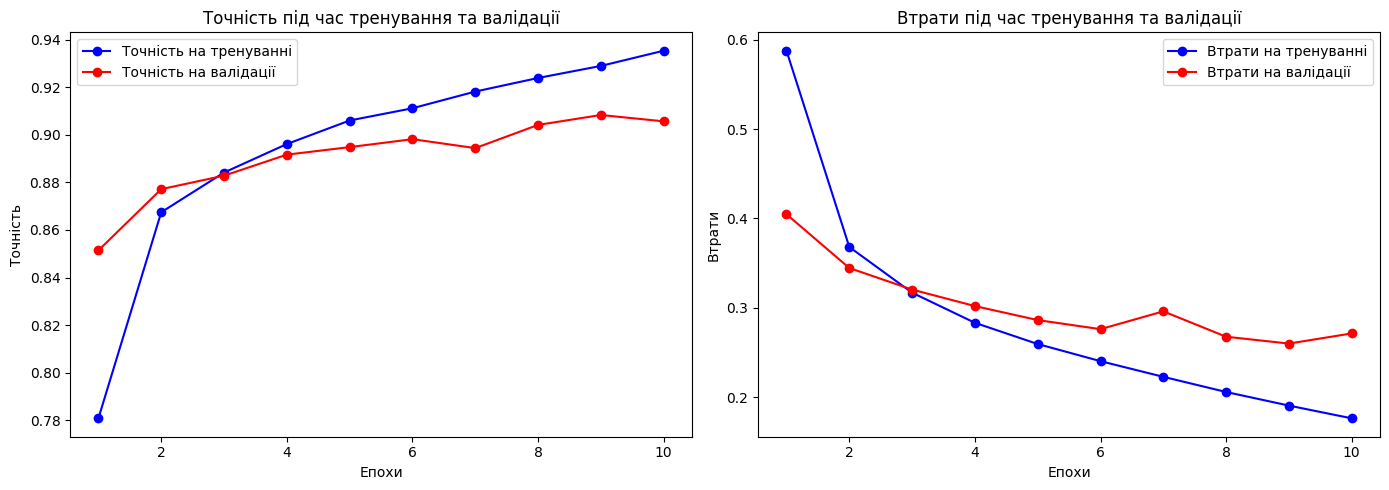

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step
Форма true_labels: (10000, 10)
Форма predicted_labels: (10000,)
Класифікаційний звіт:



ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [10]:
# 1. Побудова кривих навчання (точність та втрати)
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Графік точності
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'ro-', label='Точність на валідації')
    plt.title('Точність під час тренування та валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'ro-', label='Втрати на валідації')
    plt.title('Втрати під час тренування та валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

# 2. Результати розпізнавання: класифікаційний звіт та матриця невірних розпізнавань
true_labels = np.argmax(test_labels, axis=1)  
predicted_labels = np.argmax(model.predict(test_images), axis=1) 

# Перевірка форми міток для впевненості, що вони мають однаковий формат
print("Форма true_labels:", true_labels.shape)
print("Форма predicted_labels:", predicted_labels.shape)

# Класифікаційний звіт
print("Класифікаційний звіт:\n")
print(classification_report(true_labels, predicted_labels))

# 3. Побудова матриці невірних розпізнавань (confusion matrix)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця невірних розпізнавань')
plt.xlabel('Передбачений клас')
plt.ylabel('Істинний клас')
plt.show()

# 4. Візуалізація результатів розпізнавання
def visualize_predictions(test_images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(test_images[i], cmap='gray')
        plt.title(f"Прогноз: {class_names[predicted_labels[i]]}\nПравильно: {class_names[true_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Назви класів з датасету Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Візуалізація розпізнавання перших 10 зображень
visualize_predictions(test_images, true_labels, predicted_labels, class_names, num_images=10)


Згорткові нейронні мережі (CNN) зазвичай демонструють кращу точність на задачах комп'ютерного зору, таких як класифікація зображень, порівняно з багатошаровими мережами (MLP). Це пов'язано з тим, що CNN можуть краще витягувати ознаки з зображень завдяки згортковим та пулинговим шарам.